[View in Colaboratory](https://colab.research.google.com/github/calicinio/Testando/blob/master/RN_Exercicio_Computacional_I.ipynb)

# Exercício Computacional I - Aprendizado Supervisionado

## Descrição

Nesse exercício iremos revisar o conteúdo do primeiro módulo da disciplina. 

Iremos abordar os seguintes tópicos:

* Regressão Linear
* Estimador de Mínimos Quadrados/Máxima Verossimilhança
* Funções de Base
* Validação Cruzada

Para isso vocês irão utilizar as bibliotecas de programação científica da linguagem python (pandas, numpy, matplotlib, etc).

Inicialmente, iremos carregar todas as bibliotecas que iremos utilizar.
Execute o trecho de código abaixo para carregá-las (para executar uma célula, selecione-a e pressione ctrl+enter)

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
from IPython.display import display, HTML

## Regressão Linear

O conjunto de dados que iremos utilizar nessa parte do exercício é referente a relação entre a arrecadação com vendas de um determinado produto em diferentes mercados e gastos com publicidade em TV, Radio e Jornal (em milhares de dólares).

Vamos incialmente carregar os dados

In [2]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Essa base de dados possui três **características** ou **variáveis de entrada**:
    
    * TV - valor gasto em anúncios para a TV de um dado produto em um dado mercado (em milhares de dólares)
    * Radio - valor gasto em anúncios para o rádio de um dado produto em um dado mercado (em milhares de dólares)
    * Newspaper - valor gasto em anúncios para o jornal de um dado produto em um dado mercado (em milhares de dólares)
    
Além disso, a última coluna apresenta valor arrecadado em vendas do produto anunicado. Essa é a variável de **interesse**, ou seja a **variável de saída** do modelo que iremos construir.

Vamos verificar a dimensão da base de dados:

In [3]:
data.shape

(200, 4)

A base possui 200 linhas e 4 colunas.

As três primeiras colunas representam as $3$ características que iremos analisar e a última coluna representa a variável de interesse. 

As linhas (amostras) representam o valor investido em propaganda e o valor arrecadado em vendas do produto analisado para $200$ mercados distintos.

O nosso objetivo é construir um modelo que seja capaz de estimar o valor arrecadado em vendas do produto baseado nos gastos com propaganda para um novo mercado.

Vamos plotar o valor arrecadado em vendas em função de cada uma das características.

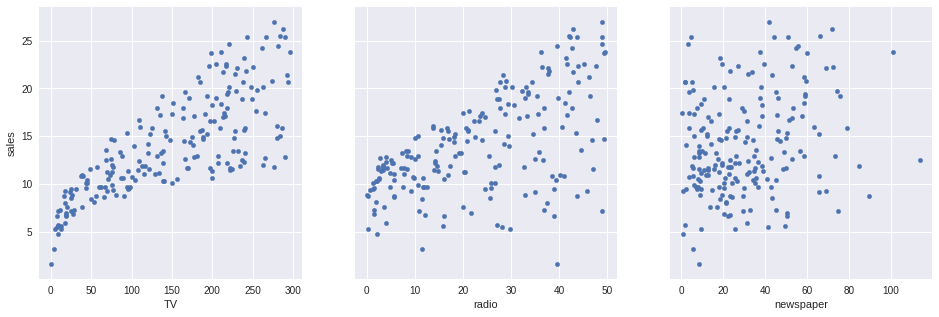

In [4]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 5))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

Em seguida, vamos construir modelos distintos que relacionam cada uma das características com o valor de vendas.

Para isso, iremos utilizar um modelo de regressão linear, conforme visto em sala, e estimar os parâmetros através da técnica de mínimos quadrados.

O modelo será definido como:

\begin{equation}
\hat{y}_i  = \sum_{j=0}^d x_{ij} \theta_{j} + \epsilon_i
\end{equation}
em que $x_{ij}$ representa a $j$-ésima característica da $i$-ésima amostra, $x_{i0} = 1$ e $\epsilon_i$ representa o ruído.

E o estimador de mínimos quadrados (e de máxima verossimilhança) dos parâmetros do modelo é dado por:

\begin{equation}
\hat{\theta} = (X^TX)^{-1}X^Ty
\end{equation}

Para validar nosso modelo, iremos dividir nossas amostras em dois conjuntos: 
    
    * Treinamento: utilizado para estimar os parâmetros do modelo (80% das amostras, ou seja, 160 amostras)
    * Teste: utilizado para avaliar o desempenho do modelo (40 amostras)
    
    
Inicialmente devemos criar o vetor de entrada, selecionando a característica de interesse e incluindo a coluna de 1s, referente aos valores de $x_{i0}$. Vamos inicialmente relacionar o valor arrecadado em vendas com o valor gasto em propagandas para a TV. 

Implemente a função abaixo que recebe como argumento um vetor contendo $n$ amostras de uma matriz de $d$ características ($d$ colunas) e retorne uma matrix de dimensão $nx2$ composta por 1s na primeira coluna e a característica em questão na segunda.

(Dica: você pode utilizar as funções *numpy.c_* e  *numpy.ones*)

In [0]:
def build_input_matrix(feature):
    #mede o tramanho do vetor de entra
    n = len(feature)
    #cria o vetor de bias
    uns = np.ones(n)
    
    #monta a matriz de saida
    saida = np.array([uns, feature])
    #transpoe a matriz
    X = saida.transpose()
    
    return X 

#  A matrix de caraceterísticas tem apenas uma coluna relativa
# aos gastos de propaganda com TV, ou seja, d=1
tv = data.TV.as_matrix()
X_tv = build_input_matrix(tv)


assert X_tv.shape == (200, 2)
assert sum(X_tv[:,0]) == tv.shape[0]


Em seguida, implemente a função que particiona os dados em treinamento e teste.

Sua função recebe como argumentos:
 * uma matriz de entrada $X$ de dimensão $n\times d$ 
 * um vetor de saída $y$ de dimensão $n\times 1$
 * um escalar $train\_ratio$ entre $[0,1]$ que define qual a proporção dos dados será utilizada para treinamento

e retorna:

 * uma matriz de entradas de treinanento $X_{train}$de dimensão $\lceil n*train\_ratio \rceil \times d$
 * um vetor de saída de treinamento dimensão $\lceil n*train\_ratio \rceil \times 1$
 * uma matriz de entradas de teste $X_{train}$de dimensão $n-\lceil n*train\_ratio \rceil \times d$
 * um vetor de saída de teste dimensão $\lceil n*train\_ratio \rceil \times 1$

In [0]:
def split_train_test(X,y, train_ratio):
  
    n = len(X)
    
    idx_end_test = np.int(np.round(n*train_ratio))
        
    X_train = X[0:idx_end_test, ]
    y_train = y[0:idx_end_test]
    
    X_test = X[idx_end_test+1:, ]
    y_test = y[idx_end_test+1:]
    
    # ESCREVA SEU CODIGO AQUI
    return (X_train, y_train, X_test, y_test)

# O vetor de saída são as arrecadações com venda do produto
y = data.sales.as_matrix()
# Particiona-se os dados usando como entrada apenas os gastos com propaganda em TV
X_tv_train, y_tv_train, X_tv_test, y_tv_test = split_train_test(X_tv, y, 0.8)


assert X_tv_train.shape == (160,2)
assert X_tv_test.shape == (39, 2)
assert y_tv_train.shape == (160,)
assert y_tv_test.shape == (39,)

Uma vez que os conjuntos entradas e saídas de treinamento e teste foram gerados, iremos estimar os parâmetros do modelo. Para isso, utilize a função *numpy.linalg.lstsq*. 

Leia a documentação da função em: http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html

Essa função estima os parâmetros do modelo via mínimos quadrados. 

Utilize as amostras (matriz de entrada e saída) do conjunto de treinamento para estimar um modelo linear que relaciona o valor gasto em propaganda de TV e o valor arrecadado de vendas.

In [0]:
theta_tv = np.linalg.lstsq(X_tv_train, y_tv_train, rcond=None)[0]

assert theta_tv.shape == (2,)
assert np.linalg.norm(theta_tv.mean()-3.55885666316) < 0.001

Uma vez estimado os parâmetros do modelo, calcule a saída do modelo para o conjunto de teste.

(Dica, a saída do modelo, para um dado conjunto de dados $X$ e um vetor de parâmetros $\theta$, é dada por $y = X\theta$)


In [0]:
y_tv_hat = np.dot(X_tv_test, theta_tv)

assert np.linalg.norm(y_tv_hat.mean()-15.0530698282) < 0.001

A figura abaixo apresenta os valores previstos pelo modelo os valores esperados de arrecadação com a venda do produto em diferentes mercados em função do gasto com propaganda em TV.

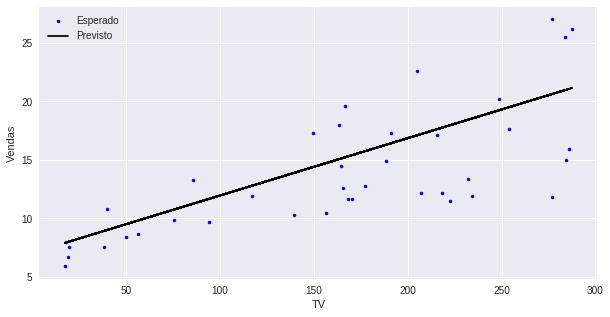

In [9]:
plt.figure(figsize=(10,5))
plt.plot(X_tv_test[:,1], y_tv_test, 'b.', label='Esperado')
plt.plot(X_tv_test[:,1], y_tv_hat, 'k-', label='Previsto')
plt.xlabel('TV')
plt.ylabel('Vendas')
plt.legend(loc='best')

Vamos agora definir um indíce quantitativo capaz de medir a qualidade do modelo estimado.

Para isso, implemente uma função que receba como argumentos:

* saída do modelo, $\hat{y}$, de dimensão $n \times 1$
* saída desejada, $y$, de dimensão $n \times 1$

E calcule o erro quadrático médio, dado por:

\begin{equation}
MSE = \frac{1}{n} \sum_{i=1}^n (y - \hat{y})^2
\end{equation}

In [0]:
def compute_mse(y, y_hat):
    
    n = len(y)
    
    mse = sum((y-y_hat)**2) * 1/n
    
    return mse
  

mse_tv = compute_mse(y_tv_test, y_tv_hat)

assert np.linalg.norm(mse_tv-14.4594347719) < 0.001

O erro quadrático médio para o conjunto de teste do modelo linear que relaciona o valor gasto em propaganda de TV com o valor arrecadado em vendas de um dado produto para diferentes mercados é:

In [11]:
print 'MSE TV: %.4f'%(mse_tv)

MSE TV: 14.4594


Repita os passos anteriores utilizando como entrada o valor gasto em propaganda de rádio. 

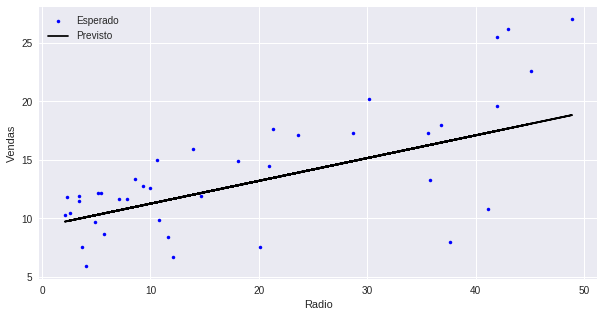

MSE Radio: 14.74815405


In [12]:
radio = data.radio.as_matrix()
# O vetor de saída são as arrecadações com venda do produto
y = data.sales.as_matrix()


X_radio = build_input_matrix(data.radio.as_matrix())
X_radio_train, y_radio_train, X_radio_test, y_radio_test = split_train_test(X_radio, y, 0.8)
theta_radio = np.linalg.lstsq(X_radio_train, y_radio_train, rcond=None)[0]
y_radio_hat = np.dot(X_radio_test, theta_radio)
mse_radio =  compute_mse(y_radio_test, y_radio_hat)

assert np.linalg.norm(mse_radio-14.74815405) < 0.001

plt.figure(figsize=(10,5))
plt.plot(X_radio_test[:,1], y_radio_test, 'b.', label='Esperado')
plt.plot(X_radio_test[:,1], y_radio_hat, 'k-', label='Previsto')
plt.xlabel('Radio')
plt.ylabel('Vendas')
plt.legend(loc='best')
plt.show()

print 'MSE Radio: %.8f'%(mse_radio)

Repita os passos anteriores utilizando como entrada o valor gasto em propaganda em jornal. 

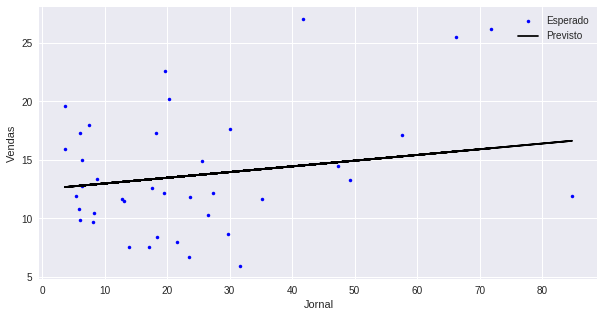

MSE Jornal: 24.97498148


In [13]:
X = data.newspaper.as_matrix()
y = data.sales.as_matrix()

X_newspaper = build_input_matrix(X)
X_newspaper_train, y_newspaper_train, X_newspaper_test, y_newspaper_test = split_train_test(X_newspaper, y, 0.80)
theta_newspaper = np.linalg.lstsq(X_newspaper_train, y_newspaper_train, rcond=None)[0]
y_newspaper_hat = np.dot(X_newspaper_test, theta_newspaper)
mse_newspaper = compute_mse(y_newspaper_test, y_newspaper_hat)

assert np.linalg.norm(mse_newspaper-24.97498148) < 0.001

plt.figure(figsize=(10,5))
plt.plot(X_newspaper_test[:,1], y_newspaper_test, 'b.', label='Esperado')
plt.plot(X_newspaper_test[:,1], y_newspaper_hat, 'k-', label='Previsto')
plt.xlabel('Jornal')
plt.ylabel('Vendas')
plt.legend(loc='best')
plt.show()

print 'MSE Jornal: %.8f'%(mse_newspaper)

## Funções de Base

Vamos agora abordar outro problema. 

Vamos construir um modelo capaz de aproximar uma função não linear a partir de funções de base polinomiais.

Nesse exemplo, nosso vetor de caraceterística terá dimensão unitária, ou seja, $d=1$.

Nosso modelo será definido da seguinte forma:

\begin{equation}
\hat{y}_i = \sum_{k=0}^p \theta_{ij} x_i^k
\end{equation}
em que $p$ é o grau do polinômio que iremos utilizar na aproximação.

Inicialmente vamos gerar um conjunto de amostras de uma função não linear a ser aproximada.

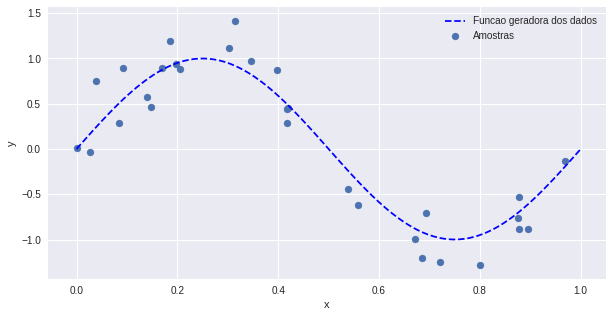

In [14]:
# Inicia-se o gerador de números aleatórios
np.random.seed(1)

# Numero de amostras
n = 30
# Desvio padrão do ruído
noise_sigma=0.3

# Função geradora dos dados
def non_linear_func(x):
    return np.sin(2 * np.pi * x)

def generate_data(n, noise_sigma):
    # Entrada
    x = np.random.uniform(0, 1, size=n)
    # Saída, definida como a função não linear geradora dos dados acrescida de um ruído,  que 
    # representa, por exemplo, erros de amostragem 
    y = non_linear_func(x) + np.random.normal(scale=noise_sigma, size=n)
    return x,y

x,y = generate_data(n, noise_sigma)

plt.figure(figsize=(10,5))
plt.scatter(x,y, label ='Amostras')
xplot=np.linspace(0,1,100)
plt.plot(xplot, non_linear_func(xplot), 'b--', label='Funcao geradora dos dados')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()

Como iremos aproximar a função por um polinômio, devemos implementar uma função que seja capaz de aplicar a função de base nas entradas:

\begin{equation}
\phi(x_i) = [1, x_i, x_i^2, \cdots, x_i^p]
\end{equation}

Para isso, você deve implementar uma função que receba como argumentos:

* um vetor de entradas, x, de dimensão $n \times 1$ 
* uma variável escalar, $p \geq 1$, referente ao grau do polinômio

e retorne uma matriz resultante da aplicação da função de base em cada elemento do vetor x, de dimensão $n \times p+1$

In [0]:
def polinomial_basis_function(x, p):
    
    n = len(x)
    X = np.zeros((n, p+1))
    
    for i in range(0, n):
      for j in range(0, p+1):
        X[i][j] = x[i]**j
    
    return X

p = 3
X = polinomial_basis_function(x, p)

assert X.shape == (n, p+1)
assert np.abs(np.linalg.norm(X)-6.84571472318) < 0.001

Construa um modelo para $p=10$ utilizando todas as amostras geradas e calcule o MSE

(Dica: utilize a função *np.linalg.lstsq* para estimar os parâmetros do modelo)

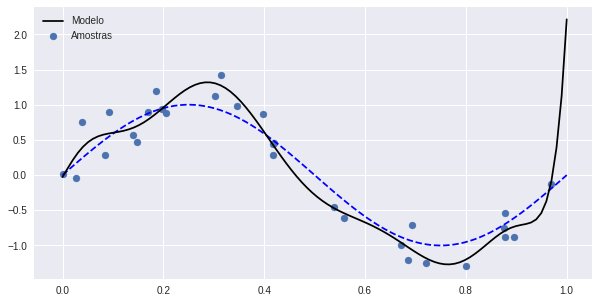

MSE: 0.033567


In [16]:
p = 10
X = polinomial_basis_function(x, p)
theta = np.linalg.lstsq(X, y, rcond=None)[0]
y_hat = np.dot(X, theta)
mse = compute_mse(y, y_hat)

assert np.abs(mse-0.0335666233823) < 0.001

plt.figure(figsize=(10,5))
plt.scatter(x, y, label ='Amostras')
plt.plot(xplot, non_linear_func(xplot), 'b--')
plt.plot(xplot, np.dot(polinomial_basis_function(xplot, p), theta), 'k-', label= 'Modelo')
plt.legend();
plt.show();

print "MSE: %4f"%(mse)

O modelo estimado para $p=10$ aparenta apresentar sobreajuste (*overfitting*).

Você irá utilizar a técnica de validação cruzada para encontrar o grau ótimo do polinômio.

Nesse exercício você utilizará a técnica de validação cruzada por amostragem aleatória (*hold out cross validation*)

Para isso você deverá implementar uma função que recebe como argumentos:

* um vetor de entradas x, com dimensão $n \times 1$
* um vetor de saídas y, com dimensão $n \times 1$
* o máximo grau do polinôomio, $p_{max}$
* o número de reptitições do experimento $k_{max}$
* a proporção das amostras a serem utilizadas no conjunto de treinamento $train_{ratio}$

E execute o seguinte algoritmo:

* Para $p=1,\cdots,p_{max}$:

    1. Construa a matriz $X$, aplicando a função de base polinomial no vetor de entrada
    2. Avalie o modelo para o valor de $p$ atual, realizando as operações abaixo $k_{max}$ vezes: 
        * Embaralhe as amostras
        * Divida as amostras em um conjunto de treinamento e validação (60%-40%)
        * Estime os parâmetros do modelo a partir do conjunto de treinamento
        * Calcule o mse do modelo para o conjunto de validação
    2. Calcule o valor médio do mse (para as $k_{max}$ execuções) para o valor de $p$ atual
    
    
* Plote um gráfico do valor médio do mse em função de $p$
* Escolha o valor de $p$ que corresponda ao mínimo do gráfico 

Antes de implementar a função que realiza a validação cruzada, você deve implementar uma função auxiliar que embaralhe as amostras. Essa função recebe como arqumentos uma matrix X e um vetor y e retorna uma matriz Xs e um vetor ys, de tal forma que as linhas de Xs e ys correspondam a uma permutação das linhas de X e y.

Para manter a coerência entre as entradas (X) e as saídas (y), a mesma sequência de embaralhamento deve ser utilizada para gerar Xs e Ys. 

Por exemplo, dado a seguite matriz X e o vetor y representando $4$ pares de entrada e saída:

\begin{align}
X = \begin{pmatrix}
    x_{10} & x_{11} & \cdots & x_{1d} \\
    x_{20} & x_{21} & \cdots & x_{2d} \\
    x_{30} & x_{31} & \cdots & x_{3d} \\
    x_{40} & x_{41} & \cdots & x_{4d} \\
\end{pmatrix}
, y = 
\begin{pmatrix}
    y_1 \\
    y_2 \\
    y_3\\
    y_4 
\end{pmatrix}
\end{align}

Você deve gerar uma sequência aleatória para o embaralhamento das linhas de X e y.
(dica: utilize a função $np.random.permutation$)

E em seguida embaralhar a matriz X e o vetor y utilizando a sequência de embaralhanento gerada.

Por exemplo, caso a sequência de embaralhamento seja $seq =[3,1,4,2]$, as matrizes Xs e Ys resultantes devem ser:

\begin{align}
Xs = \begin{pmatrix}
    x_{30} & x_{31} & \cdots & x_{3d} \\
    x_{10} & x_{11} & \cdots & x_{1d} \\
    x_{40} & x_{41} & \cdots & x_{4d} \\
    x_{20} & x_{21} & \cdots & x_{2d} 
\end{pmatrix}
, ys = 
\begin{pmatrix}
   y_3\\
    y_1 \\
    y_4 \\
    y_2 
\end{pmatrix}
\end{align}


In [0]:
def shuffle_samples(X,y):
    n = len(X)

    idx_random = np.random.permutation(n)
    
    Xs = X[idx_random][:]
    ys = y[idx_random]

    return  Xs, ys

Uma vez implementada a função auxiliar acima, você deve implementar a função que realiza a validação cruzada.

(Diferente das funções anteriores, essa função é mais complexa e, provalvemente, você gastará mais tempo para desenvolvê-la).

In [0]:
def cross_validation(x,y, p_max, k_max, train_ratio):
    
    mse = np.zeros((p_max, k_max))
    mse_medio = np.zeros((p_max, 1))

    n = len(x)
    idx_train = np.int(np.round(n*train_ratio))

    for p in range(0, p_max):

      X = polinomial_basis_function(x, p)

      for k in range(0, k_max):

        random_X, random_y = shuffle_samples(X, y)

        X_train = random_X[0:idx_train][:]
        y_train = random_y[0:idx_train]

        X_test = random_X[idx_train+1:][:]
        y_test = random_y[idx_train+1:]

        theta = np.linalg.lstsq(X_train, y_train, rcond=None)[0]

        y_hat = np.dot(X_test, theta)

        mse[p][k] = compute_mse(y_test, y_hat)

      mse_medio[p] = np.median(mse[p][:])
  
    menor_valor = mse_medio.min()

    p_star = np.int(np.where(mse_medio == menor_valor)[0])
    
    plt.plot(mse_medio, 'b-*', )  
    plt.xlabel('Grau do polinonimo')
    plt.ylabel('MSE')
    plt.show()    
    
    return p_star

Uma vez definida a função *cross_validation*, vamos utilzá-la para encontrar o grau ótimo do polinômio para um problema de aproximação contendo 30 amostras.

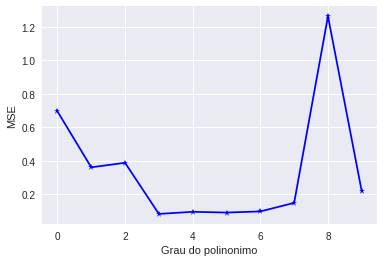

In [20]:
np.random.seed(1)
n = 30
p_max = 10
k_max = 20
train_ratio = 0.6

x,y = generate_data(n, noise_sigma)
p_star =  cross_validation(x,y, p_max, k_max, train_ratio)

assert p_star == 3

Vamos agora utlizar a função novamente, porém para uma base de dados contendo 2000 amostras.

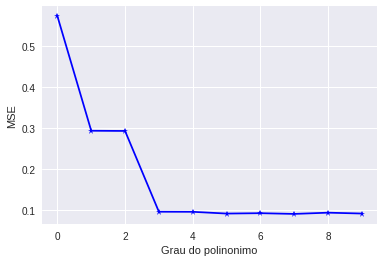

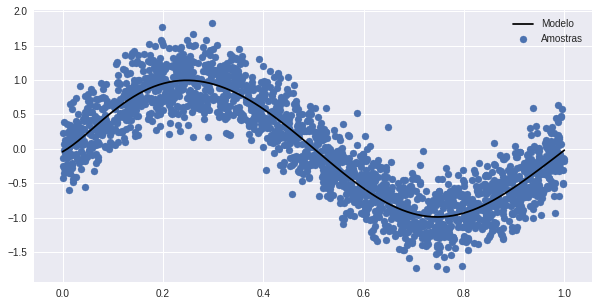

In [22]:
np.random.seed(1)
n  = 2000
x,y = generate_data(n, noise_sigma)
p_star = cross_validation(x,y, p_max, k_max, train_ratio) + 1

assert p_star==8

X = polinomial_basis_function(x, p_star)
theta = np.linalg.lstsq(X, y, rcond=None)[0]


plt.figure(figsize=(10,5))
plt.scatter(x, y, label ='Amostras')
plt.plot(xplot, np.dot(polinomial_basis_function(xplot, p_star), theta), 'k-', label= 'Modelo')
plt.legend();
plt.show();


##### Explique porque no experimento com 2000 amostras o grau ótimo do polinômio encontrado foi maior que no experimento com 30.  Qual é a influência do número de amostras de treinamento na capacidade do modelo?

O experimento com maior número de amostras tem o grau do polinômio aumentado porquê possui um maior quantidade de pontos a serem ajustados, implicando em uma maior complexidade do problema, requerendo assim um grau de polinomio maior.
Sendo assim, a quantidade pontos na fase de treinamento implicará diretamente da capacidade de modelo.